In [253]:
using DifferentialEquations;

using ArgParse; # Argument parsing

# Benchmarking & profiling packages
using BenchmarkTools;
using StatProfilerHTML;

# Visualization packages
using DataFrames;
using Plots;
using Gadfly;
using Cairo;
using JLD;

using Statistics;
using HypothesisTests;

In [254]:
function meanpositives(mat::Matrix)
    nc = size(mat,1)
    sums = zeros(nc)
    counts = zeros(nc)
    for c in 1:nc
        for r in 1:size(mat,2)
            v = mat[c,r]
            if v > 0
                sums[c] += v
                counts[c] += 1.0
            end
        end
    end
    Float64[(counts[i]>0 ? sums[i]/counts[i] : 0.0) for i in 1:nc]
end

meanpositives (generic function with 1 method)

In [255]:
function stdpositives(mat::Matrix, means::Vector)
    nc = size(mat,1)
    sums = zeros(nc)
    counts = zeros(nc)
    for c in 1:nc
        for r in 1:size(mat,2)
            v = mat[c,r]
            if v > 0
                sums[c] += (v-means[c])^2
                counts[c] += 1.0
            end
        end
    end

    Float64[(counts[i]>0 ? sqrt(sums[i]/counts[i]) : 0.0) for i in 1:nc]
end

stdpositives (generic function with 1 method)

In [256]:
function processAllCell!(allCells, cellMatrix50, cellMatrixC, cellMatrixM)
    for i in 1:lastindex(allCells)
        # print(size(allCells[i].Np50p50)[1])
        if size(allCells[i].cMyc)[1] >= 721
            # viableCells += 1;
            push!(cellMatrix50, allCells[i].WTcRel[1:721]); #Np50p50
            push!(cellMatrixC, allCells[i].NcRel[1:721]);
            push!(cellMatrixM, allCells[i].cMyc[1:721]);
        end
    end
end

processAllCell! (generic function with 1 method)

┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


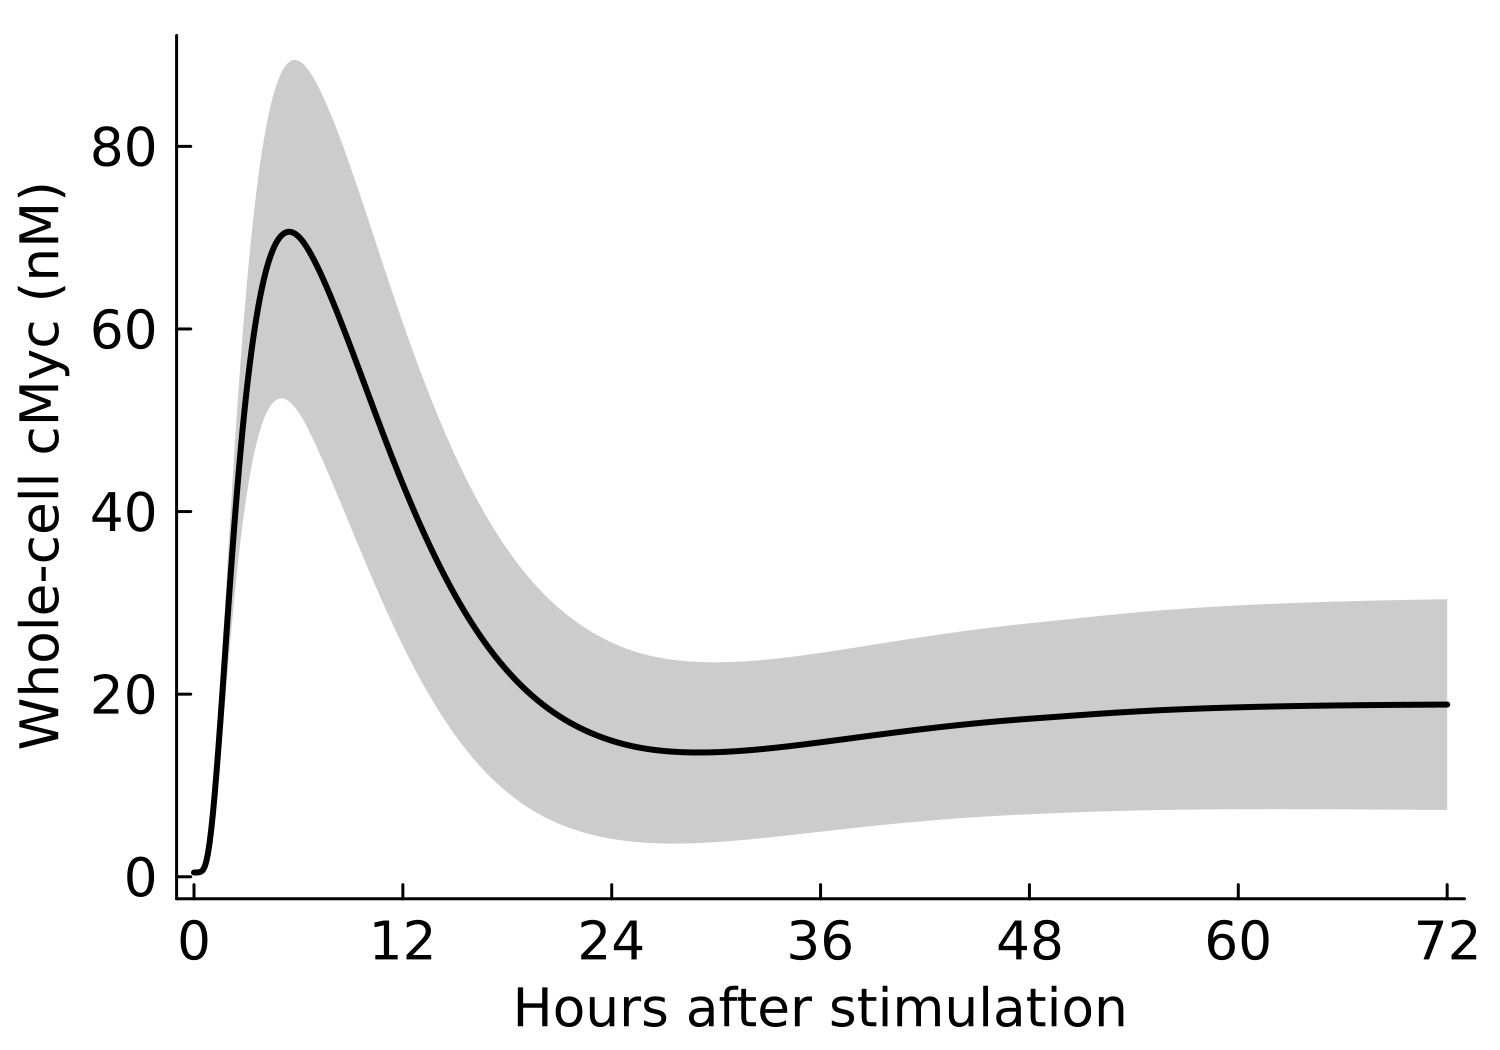

In [257]:
cells_fn = "/Users/helenhuang/Downloads/cells_cRelAbundance_WT31n.jld";
WTcellMatrix50 = Vector{Float64}[]; # Np50p50
WTcellMatrixC = Vector{Float64}[]; # nuclear cRel
WTcellMatrixM = Vector{Float64}[]; # nuclear cMyc

allCells = load(cells_fn, "allCells");
processAllCell!(allCells, WTcellMatrix50, WTcellMatrixC, WTcellMatrixM);

WTcellMatrix50 = reduce(hcat, WTcellMatrix50);
meanCells50 = meanpositives(WTcellMatrix50);
# baseline50 = meanCells50[1];
# NmeanCells50 = meanCells50 / baseline50;
stdCells50 = stdpositives(WTcellMatrix50, meanCells50) # / baseline50;

WTcellMatrixC = reduce(hcat, WTcellMatrixC);
meanCellsC = meanpositives(WTcellMatrixC);
# baselineC = meanCellsC[1];
# NmeanCellsC = meanCellsC / baselineC;
stdCellsC = stdpositives(WTcellMatrixC, meanCellsC) # / baselineC;

WTcellMatrixM = reduce(hcat, WTcellMatrixM);
meanCellsM = meanpositives(WTcellMatrixM);
# baselineM = meanCellsM[1];
# NmeanCellsM = meanCellsM / baselineM;
stdCellsM = stdpositives(WTcellMatrixM, meanCellsM) # / baselineM;

# plotCells50 = Plots.plot([0:0.1:72.0;], meanCells50, c=RGB(0/255, 0/255, 0/255), size=(500,350), xlabel="Hours after stimulation", ylabel="Nuclear p50:p50 (nM)",grid=false, xlim=(-1.0, 73.0), xticks = ([0:12:72;]), label = "WT", ribbon=stdCells50, fillalpha=.2, lw = 2, dpi=300, legendfontsize=11, guidefontsize=12, tickfontsize=12, legend=false)
plotCells50 = Plots.plot([0:0.1:72.0;], meanCells50, c=RGB(0/255, 0/255, 0/255), size=(500,350), xlabel="Hours after stimulation", ylabel="Whole cell cRel (nM)",grid=false, xlim=(-1.0, 73.0), xticks = ([0:12:72;]), label = "WT", ribbon=stdCells50, fillalpha=.2, lw = 2, dpi=300, legendfontsize=11, guidefontsize=12, tickfontsize=12, legend=false)
plotCellsC = Plots.plot([0:0.1:72.0;], meanCellsC, c=RGB(0/255, 0/255, 0/255), size=(500,350), xlabel="Hours after stimulation", ylabel="Nuclear cRel (nM)",grid=false, xlim=(-1.0, 73.0), xticks = ([0:12:72;]), label = "WT", ribbon=stdCellsC, fillalpha=.2, lw = 2, dpi=300, legendfontsize=11, guidefontsize=12, tickfontsize=12, legend=false)
plotCellsM = Plots.plot([0:0.1:72.0;], meanCellsM, c=RGB(0/255, 0/255, 0/255), size=(500,350), xlabel="Hours after stimulation", ylabel="Whole-cell cMyc (nM)",grid=false, xlim=(-1.0, 73.0), xticks = ([0:12:72;]), label = "WT", ribbon=stdCellsM, fillalpha=.2, lw = 2, dpi=300, legendfontsize=11, guidefontsize=12, tickfontsize=12, legend=false)


┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


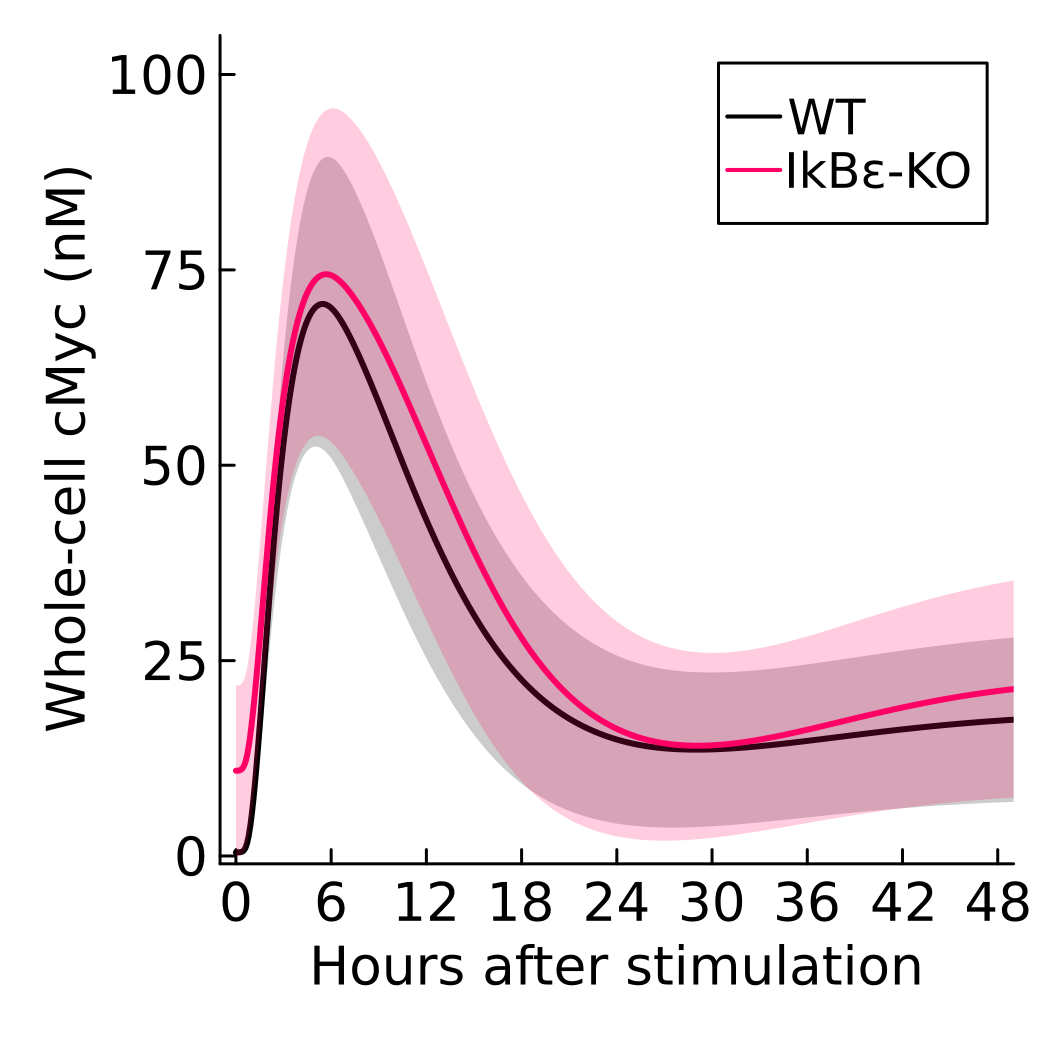

In [258]:
cells_fn = "/Users/helenhuang/Downloads/cells_cRelAbundance_KO31n.jld";
KOcellMatrix50 = Vector{Float64}[]; # Np50p50
KOcellMatrixC = Vector{Float64}[]; # nuclear cRel
KOcellMatrixM = Vector{Float64}[]; # nuclear cMyc

allCells = load(cells_fn, "allCells");
processAllCell!(allCells, KOcellMatrix50, KOcellMatrixC, KOcellMatrixM);

KOcellMatrix50 = reduce(hcat, KOcellMatrix50);
meanCells50 = meanpositives(KOcellMatrix50);
# baseline50 = meanCells50[1];
# NmeanCells50 = meanCells50 / baseline50;
stdCells50 = stdpositives(KOcellMatrix50, meanCells50) # / baseline50;

KOcellMatrixC = reduce(hcat, KOcellMatrixC);
meanCellsC = meanpositives(KOcellMatrixC);
# baselineC = meanCellsC[1];
# NmeanCellsC = meanCellsC / baselineC;
stdCellsC = stdpositives(KOcellMatrixC, meanCellsC) # / baselineC;

KOcellMatrixM = reduce(hcat, KOcellMatrixM);
meanCellsM = meanpositives(KOcellMatrixM);
# baselineM = meanCellsM[1];
# NmeanCellsM = meanCellsM / baselineM;
stdCellsM = stdpositives(KOcellMatrixM, meanCellsM) # / baselineM;

# Plots.plot!(plotCells50, [0:0.1:72.0;], meanCells50, c=RGB(255/255, 0/255, 102/255), size=(350,350), xlabel="Hours after stimulation", ylabel="Nuclear p50:p50 (nM)",grid=false, xlim=(-1.0, 73.0), ylim=(-1.0, 60), xticks = ([0:12:72;]), label = "IkBε-KO", ribbon=stdCells50, fillalpha=.2, lw = 2, dpi=300, legendfontsize=11, guidefontsize=12, tickfontsize=12, legend=true)
Plots.plot!(plotCells50, [0:0.1:72.0;], meanCells50, c=RGB(255/255, 0/255, 102/255), size=(350,350), xlabel="Hours after stimulation", ylabel="Whole cell cRel (nM)",grid=false, xlim=(-1.0, 49.0), xticks = ([0:6:48;]), label = "IkBε-KO", ribbon=stdCells50, fillalpha=.2, lw = 2, dpi=300, legendfontsize=11, guidefontsize=12, tickfontsize=12, legend=true)
Plots.plot!(plotCellsC, [0:0.1:72.0;], meanCellsC, c=RGB(255/255, 0/255, 102/255), size=(350,350), xlabel="Hours after stimulation", ylabel="Nuclear cRel (nM)",grid=false, xlim=(-1.0, 49.0), ylim=(-1.0, 320), xticks = ([0:6:48;]), label = "IkBε-KO", ribbon=stdCellsC, fillalpha=.2, lw = 2, dpi=300, legendfontsize=11, guidefontsize=12, tickfontsize=12, legend=true)
Plots.plot!(plotCellsM, [0:0.1:72.0;], meanCellsM, c=RGB(255/255, 0/255, 102/255), size=(350,350), xlabel="Hours after stimulation", ylabel="Whole-cell cMyc (nM)",grid=false, xlim=(-1.0, 49.0), ylim=(-1.0, 105.0), xticks = ([0:6:48;]), label = "IkBε-KO", ribbon=stdCellsM, fillalpha=.2, lw = 2, dpi=300, legendfontsize=11, guidefontsize=12, tickfontsize=12, legend=true)


In [259]:
UnequalVarianceTTest(WTcellMatrixC[1,:], KOcellMatrixC[1,:])

Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          -21.0407
    95% confidence interval: (-24.01, -18.07)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-40

Details:
    number of observations:   [1000,1000]
    t-statistic:              -13.880597851334876
    degrees of freedom:       1532.661462563109
    empirical standard error: 1.515837203216318


In [260]:
EqualVarianceTTest(WTcellMatrixC[1,:], KOcellMatrixC[1,:])

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          -21.0407
    95% confidence interval: (-24.01, -18.07)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-41

Details:
    number of observations:   [1000,1000]
    t-statistic:              -13.880597851334874
    degrees of freedom:       1998
    empirical standard error: 1.5158372032163183


In [261]:
VarianceFTest(WTcellMatrixC[1,:], KOcellMatrixC[1,:])

Variance F-test
---------------
Population details:
    parameter of interest:   variance ratio
    value under h_0:         1.0
    point estimate:          0.28948

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-99

Details:
    number of observations: [1000, 1000]
    F statistic:            0.2894803218233156
    degrees of freedom:     [999, 999]


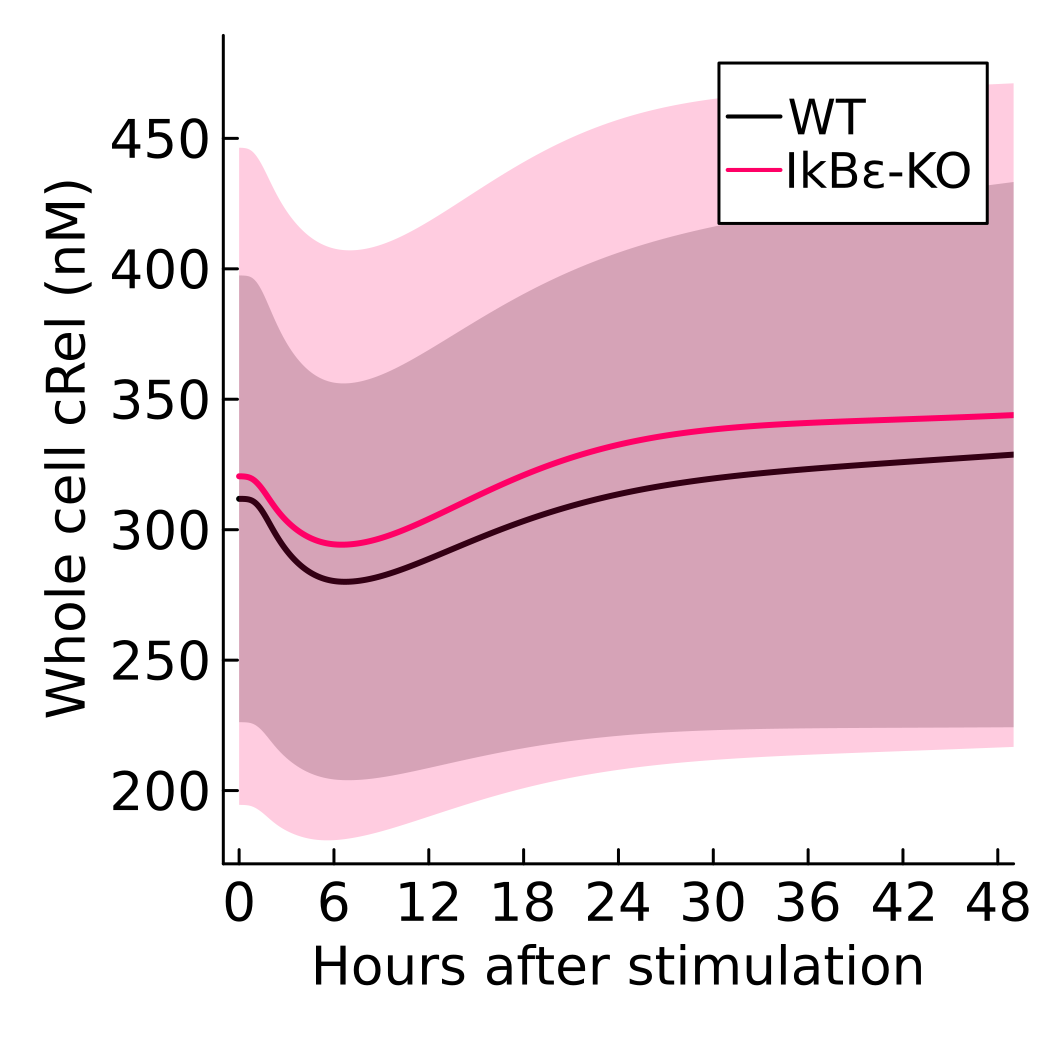

In [262]:
Plots.plot!(plotCells50)

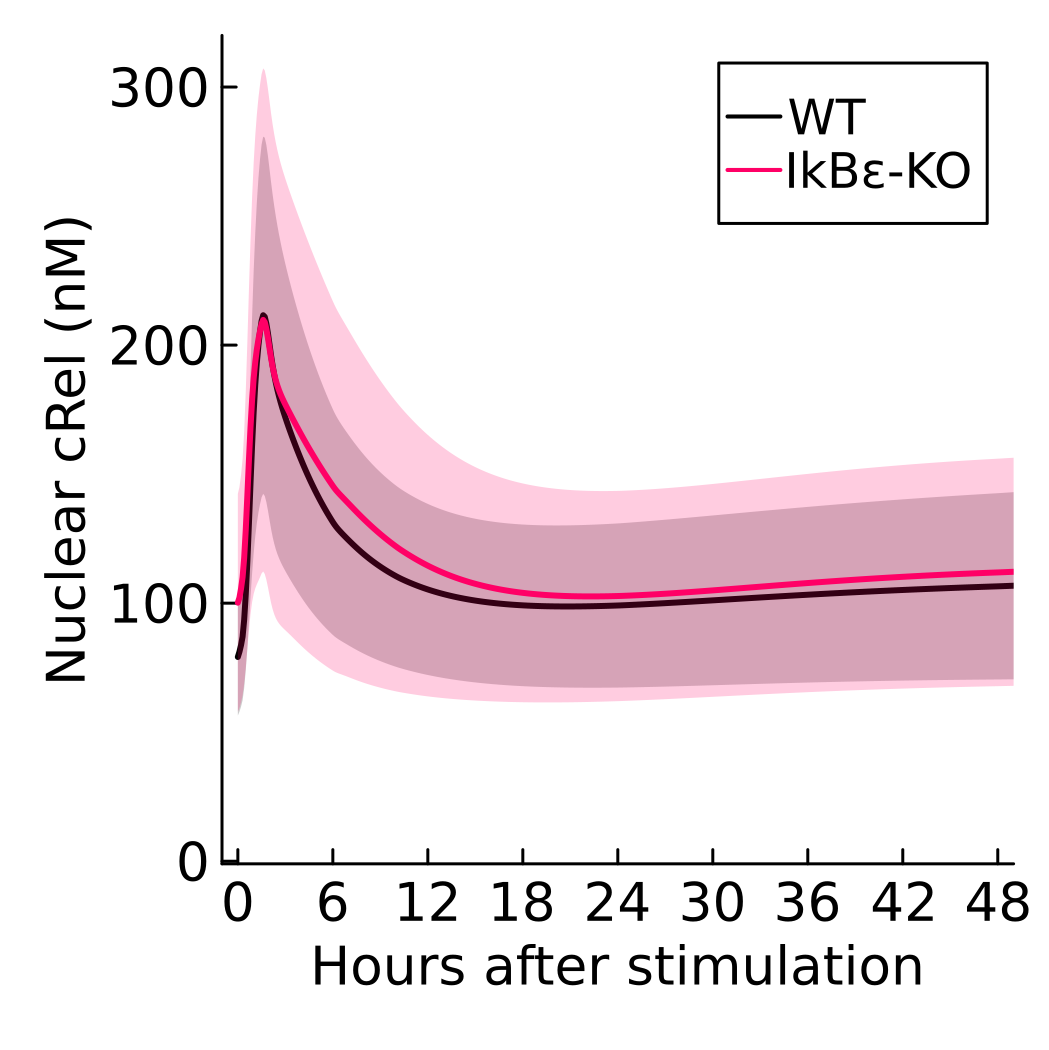

In [263]:
Plots.plot!(plotCellsC)

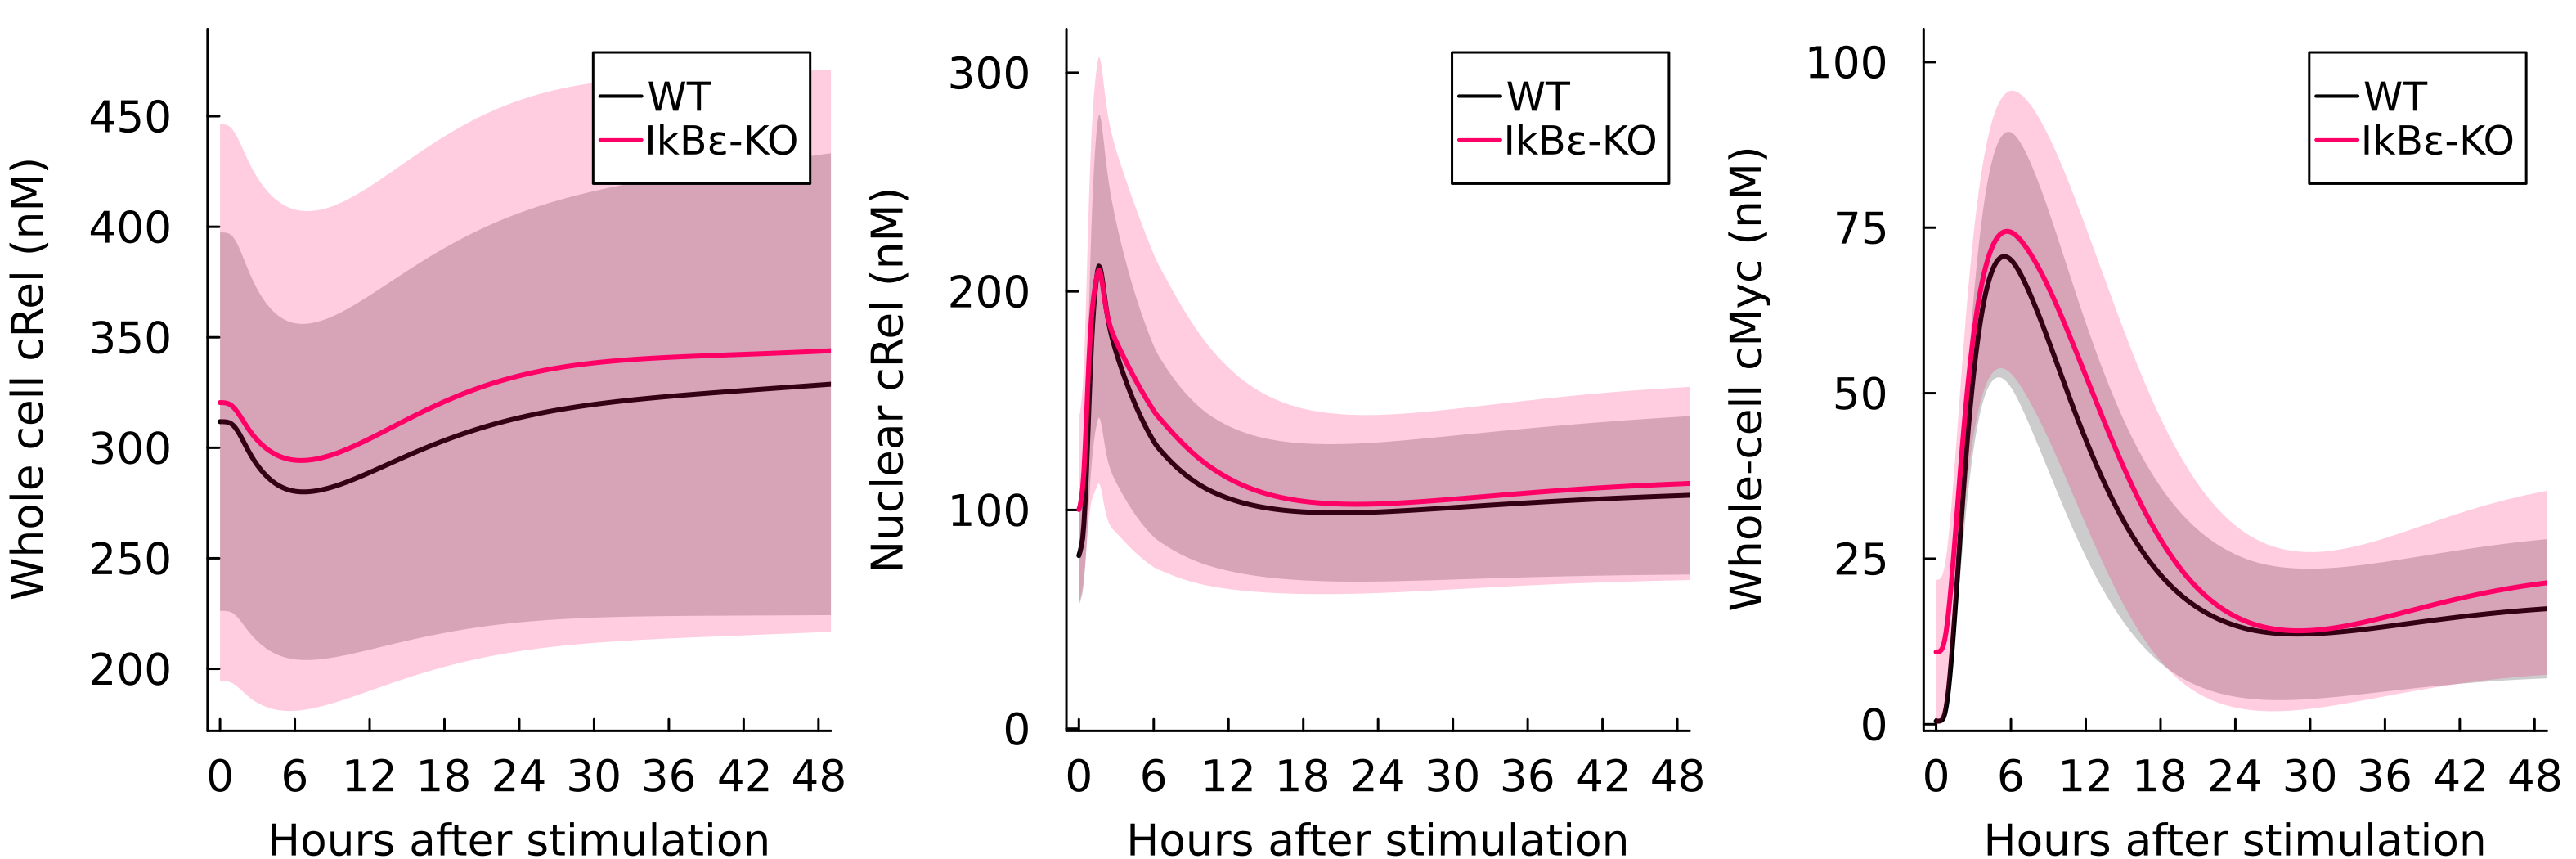

In [264]:
Plots.plot!(plotCells50, plotCellsC, plotCellsM, layout = (1, 3), size=(1050,350), left_margin=20Plots.px, bottom_margin=20Plots.px)

In [265]:
savefig("/Users/helenhuang/Downloads/cRelvMyc_trajectory_BF31.png")